# **Регрессируем функцию $f(x) = \sin x$**

In [0]:
import torch

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

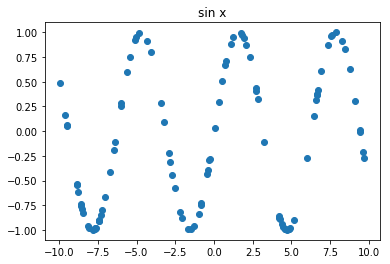

In [5]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('sin x');

In [0]:
noise = torch.randn(y_train.shape) / 5.


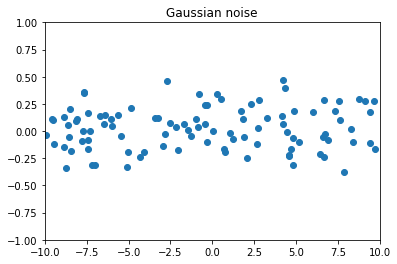

In [7]:
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

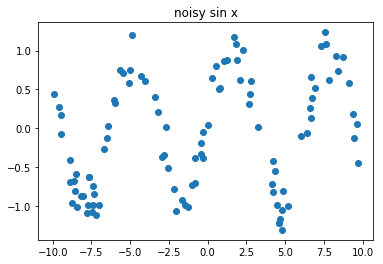

In [8]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin x');

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

# **Валидация**

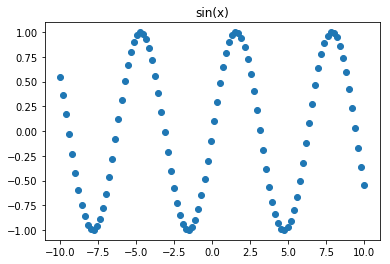

In [10]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# **Model construction**

In [0]:
class SinNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        """Ну вот просто такая архитектура"""
        super(SinNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x
    
    def fit(self, X_train, y_train):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01)
        
        for epoch_index in range(2000):
            optimizer.zero_grad()

            y_pred = sin_net.forward(x_train)
            loss_val = self.loss(y_pred, y_train)

            loss_val.backward()

            optimizer.step()
        
        return self
    
    def predict(self, x):
        y_pred = self.forward(x)
        return y_pred
    
        
    
    @staticmethod
    def loss(pred, target):
        squares = (pred - target) ** 2
        return squares.mean()
        

In [0]:
sin_net = SinNet(50)

In [0]:
def visual(x, y, y_pred):
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

# **Prediction**

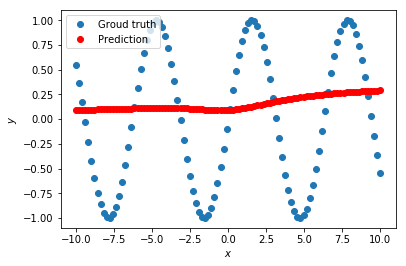

In [15]:
visual(x_validation, y_validation, sin_net.predict(x_validation))

In [16]:
sin_net.fit(x_train, y_train)

SinNet(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (act): Sigmoid()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)

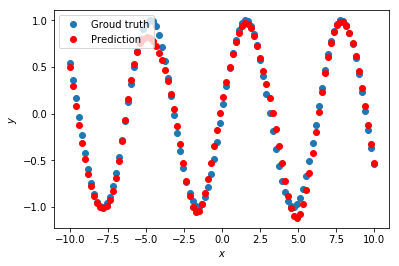

In [17]:
visual(x_validation, y_validation, sin_net.predict(x_validation))